# COGS 108 - Bikeshare Systems' Impact on Cardiovascular Disease

## Presentation Links

Slides: https://docs.google.com/presentation/d/1RVXPwDKdt08x8OIC3ZPbPeZ1sKTXiXN84kkg6mgjtLM/edit?usp=sharing

Video: https://www.youtube.com/watch?v=pDzlUUVc4Co 

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ X ] YES - make available
* [  ] NO - keep private

# Overview

In this analysis, we explore whether or not the implementation of bikesharing systems is related to cardiovascular health. We studied three major bikeshare systems in Washington D.C., Los Angelas, and Chicago, and tested for correlation between cardiovascular death rates per county and bikesharing in the corresponding city. We looked at three different measures of bikeshare usage each year: total trips taken, average trip duration, and total duration of all trips. After analyzing the data, we could not conclude that cardiovascular health and bikesharing are correlated.

# Names

- Kevin Bui
- David Chang
- Lawrence Song
- Zoe Wong

<a id='research_question'></a>
# Research Question

Is there a relationship between the number, length, or magnitude of bikesharing rides and cardiovascular disease rates in Washington D.C., Chicago, and Los Angeles?

<a id='background'></a>

## Background & Prior Work


Bikesharing systems, which allow users to conveniently rent or borrow a bike from one location, ride it, and return it to another location at the end of the trip, were first introduced to the U.S. in 2010. They have become increasingly popular in the years since (1); in 2019, users took nearly 40 million trips through bikesharing systems in the U.S. (2). These users are more likely to be men, with women making only about ¼ of all bikesharing trips (8). A member survey administered by Capital Bikeshare confirmed that relative to the surrounding area of Washington, its bikeshare users were younger, more likely to be male, and more likely to be Caucausian (9). 

Bikesharing provides many potential benefits, such as reduced vehicle emissions and fuel consumption, flexible and affordable transportation, and our topic of interest, public health improvements. As bikesharing becomes more widely used across the United States, we want to learn more about how it could help our cities and if it is a worthwhile investment.

One quantitative analysis would seem to suggest that the answer is yes: researchers concluded that U.S. bikesharing generates as much as $36 million in health economic impacts each year, largely because of increases in physical activity (3). 

In a 2019 paper, Xu showed that the existence of bikeshare programs leads to declines in obesity rates using county-level obesity data from the CDC and city-level bikeshare system data from the National Association of City Transportation Officials. The analysis was done using a "difference in differences" model, which compared obesity rates before and after the institution of bikesharing to control counties that never implemented a bikesharing system (4). We are interested in a similar analysis, but we focus on bikesharing's impact on heart disease instead of obesity. 

Previously, a UK study of more than 260,000 participants showed that commuting to work by bicycle is associated with lower risk of cardiovascular disease (10). Although it did not study bikeshare systems specifically, it provides support for the idea that they may have a positive impact on a serious public health problem. According to the CDC, almost 660,000 people (1 in 4 deaths) die of heart disease in the U.S. each year, costing billions of dollars in health care costs, medicine, and lost productivity (5). It has been known for many years that one major way to lower the risk of heart disease is physical activity (6); conversely, physical inactivity has been shown to almost double the risk of developing coronary heart disease (7). Since bikesharing may help increase rates of physical activity, we are interested in exploring a potential relationship between bikesharing rides and the rates of cardiovascular disease. 


References:
1. https://www.pedbikeinfo.org/topics/bikeshare.cfm
2. https://nacto.org/shared-micromobility-2019/
3. https://www.sciencedirect.com/science/article/abs/pii/S0013935121010033?casa_token=MpD9TOjj5TQAAAAA:WXEFs-5ID_jFu3_g5Qv4V-L8j4eH52F3D-DGrlraSo9g_PxCQAbB3krXgKtBl6PRq0JKRi1CGg 
4. https://www.sciencedirect.com/science/article/pii/S1361920918304103?casa_token=4csOXIogEX8AAAAA:Y7QPiZueXkl5pritXnblMw1MtgdEjumJ5MHniW-URn78xZQxG1P1dWlyQ9Q28U4siqCalhs9Cg
5. https://www.cdc.gov/heartdisease/facts.htm
6. https://www.nhlbi.nih.gov/health-topics/physical-activity-and-your-heart
7. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2486506/pdf/bullwho00412-0005.pdf
8. https://findingspress.org/article/10802-quantifying-the-bicycle-share-gender-gap
9. https://d21xlh2maitm24.cloudfront.net/wdc/Capital-Bikeshare_2016MemberSurvey_Final-Report.pdf?mtime=20170303165531
10. https://www.bmj.com/content/357/bmj.j1456?tab=related#datasupp


# Hypothesis


We hypothesize that there is a small but significant negative correlation between the duration and amount of bikesharing rides and cardiovascular disease rates in our cities of interest. We think this is the case because longer and more plentiful bike rides generally indicate an increase in physical activity, which has been shown to decrease the risk of heart disease. We predict that the effect will be small because only a subset of the population will be regularly using the bikeshare system. 

# Datasets


- Dataset Name: Los Angeles Metro Bike Share Data
- Link to the dataset: https://bikeshare.metro.net/about/data/
- Number of observations: 132,247 (131,661 after removing null values)

This data set records the time, date, and duration of rides taken by users of bike sharing systems in Los Angeles. It also records whether the user had a subscription or used a per trip fare.

- Dataset Name: Chicago Bike Share Data
- Link to the dataset:https://divvy-tripdata.s3.amazonaws.com/index.html
- Number of observations: 72,131

This data set records the time, date, and duration of rides taken by users of bike sharing systems in Chicago. It also records whether the user had a subscription or used a per trip fare.

- Dataset Name: Washington D.C. Bike Share Data
- Link to the dataset: https://s3.amazonaws.com/capitalbikeshare-data/index.html
- Number of observations: 552,399

This data set records the time, date, and duration of rides taken by users of bike sharing systems in Washington D.C.. It also records whether the user had a subscription or used a per trip fare.
 
- Dataset Name: Heart Disease
- Link to the dataset: https://nccd.cdc.gov/DHDSPAtlas/Reports.aspx
This data set records the number of Cardiovascular Disease Deaths per 100,000 people per county throughout the United States. 



# Setup

In [1]:
## Import the necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import patsy
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

# Data Cleaning

For the bikeshare datasets that were too large to import due to GitHub storage limitations, we cleaned and combined the datasets on our local computer. Because the bike sharing data was either split by quarters or per month, we downloaded all of the files for the time period we were interested in and stored them in a folder. We then created a script (included below) to parse through the folder and aggregate all of the data into a single CSV file for each city. For each year in the dataset, we collected the total number of bike trips, the total duration of all bike trips, and the average duration of bike trips.

In [2]:
## Script that was used on our local machine to parse through the oversized CSV files and obtain the necessary data
## NOTE: Because we used 'os' for our local, running the script here in the notebook will not work

def script_read_data(nameOfFile, cityName, path):

    def clean_csv(path):
        temp = pd.read_csv(path) ## DataFrame obtatined from the path
        toread = temp['Start date'][0][0:4] ## Getting The Year
        if toread not in check.keys():
            check[toread] = [] 
        ## (Total Duration of Ride, Average Duration of Ride, Number or Riders)
        check[toread].append((temp['Duration'].sum(), temp['Duration'].mean(), temp.shape[0]))

    check = {}

    for filename in os.listdir(path): ## Iterating through folder
        f = os.path.join(path_of_the_directory,filename) ## File from desired path
        if os.path.isfile(f): ## Just checking to see if file is an actual file
            clean_csv(f) ## Obtaining the necessary values from the csv file
    
    ## Aggregates all of the data from the years
    for i in check:
        counter = 0
        t_duration = 0
        t_mean = 0
        t_ride = 0
        for j in check[i]:
            counter += 1
            t_duration += j[0]
            t_mean += j[1]
            t_ride += j[2]
        t_mean / counter
        i = int(i)
        total[i].append(t_duration)
        total[i].append(t_mean)
        total[i].append(t_ride)
        
    ## Setting up Column data
    city_columns = []
    year_columns = []
    total_duration = []
    mean_duration = []
    num_rides = []
    
    ## Sets up the dictionary to eventually become the dataframe to export
    for i in check:
        la_columns.append(cityName)
        year_columns.append(i)
        total_duration.append(total[i][0])
        mean_duration.append(total[i][1])
        num_rides.append(total[i][2])
    
    ## Sets up DataFrame
    d = {'City': la_columns, 'Year': year_columns, 'Average Duraiton (sec)': mean_duration,
    'Total duration (hr)': total_duration, 'Num of Trips': num_rides}
    
    out_df = pd.DataFrame(data = d) ## Data to DataFrame
    
    out_df.to_csv(nameOfFile) ## Export DataFrame to csv file

In the following cell, we load the aggregated CSV files that the previous script created. 

In [3]:
## LA Data
la_data_new = pd.read_csv('Datasets/LA_DATA')

## Chicago Data
chicago_data_new = pd.read_csv('Datasets/chicago_compressed_data_1.csv')

## DC Data
dc_data_new = pd.read_csv('Datasets/DC_DATA')


### Clean LA data

In the following cells, we drop the extra column 'Unnamed: 0' and ensure that all of the values are floats or integers.

In [4]:
# Before cleaning
la_data_new.head()

,Unnamed: 0,City,Year,Average Duraiton (sec),Total duration (hr),Num of Trips
0,0,Los Angeles,2016,49.275862,2421733,98637
1,1,Los Angeles,2017,120.572151,7020915,229255
2,2,Los Angeles,2018,162.381270,12838601,311894
3,3,Los Angeles,2019,124.761510,9024061,290342


In [5]:
# Drop 'Unnamed' column
la_data_new.drop('Unnamed: 0', axis = 1, inplace = True)

In [6]:
# drop null values
la_data_new = la_data_new.dropna()

In [7]:
# Check data types to make sure our numbers are floats or integers, not strings
la_data_new.dtypes

City                       object
Year                        int64
Average Duraiton (sec)    float64
Total duration (hr)         int64
Num of Trips                int64
dtype: object

### Clean Chicago data
In the following cells, we drop null values from the dataframe and convert the 'Year' column from a float to an integer.

In [8]:
# Before cleaning
chicago_data_new.head()

,City,Year,Average duration (seconds),Total duration (hours),number of trips
0,Chicago,2013.0,1239.470455,2.615930e+05,759789.0
1,Chicago,2014.0,1024.938453,6.988483e+05,2454639.0
2,Chicago,2015.0,1024.424273,1.604386e+06,5638084.0
3,Chicago,2016.0,980.884489,8.651374e+05,3175190.0
4,Chicago,2017.0,1026.619499,3.429965e+06,12027702.0


In [9]:
# drop null values
chicago_data_new = chicago_data_new.dropna()

In [10]:
# check data types
chicago_data_new.dtypes


City                           object
Year                          float64
Average duration (seconds)    float64
Total duration (hours)        float64
number of trips               float64
dtype: object

In [11]:
# convert Year into int
chicago_data_new['Year'] = chicago_data_new['Year'].astype(int)

### Clean DC data

In [12]:
# Before cleaning
dc_data_new.head()

,Unnamed: 0,City,Year,Average Duraiton (sec),Total duration (hr),Num of Trips
0,0,DC,2013,4008.900852,2637921822,2555541
1,1,DC,2014,3963.235575,3012103845,2913150
2,2,DC,2015,4104.059452,3420101908,3185906
3,3,DC,2016,4500.924013,3833466787,3333994
4,4,DC,2017,4506.081815,4334096329,3757777


In [13]:
# Drop 'Unnamed' column
dc_data_new.drop('Unnamed: 0', axis = 1, inplace = True)

In [14]:
# check data types
dc_data_new.dtypes

City                       object
Year                        int64
Average Duraiton (sec)    float64
Total duration (hr)         int64
Num of Trips                int64
dtype: object

### Preview total bikesharing data
In the following cells, we preview our cleaned, aggregated datasets.

In [15]:
# Preview LA data
print(la_data_new.shape)
la_data_new.head()

(4, 5)


,City,Year,Average Duraiton (sec),Total duration (hr),Num of Trips
0,Los Angeles,2016,49.275862,2421733,98637
1,Los Angeles,2017,120.572151,7020915,229255
2,Los Angeles,2018,162.381270,12838601,311894
3,Los Angeles,2019,124.761510,9024061,290342


In [16]:
# Preview Chicago data
print(chicago_data_new.shape)
chicago_data_new.head()

(7, 5)


,City,Year,Average duration (seconds),Total duration (hours),number of trips
0,Chicago,2013,1239.470455,2.615930e+05,759789.0
1,Chicago,2014,1024.938453,6.988483e+05,2454639.0
2,Chicago,2015,1024.424273,1.604386e+06,5638084.0
3,Chicago,2016,980.884489,8.651374e+05,3175190.0
4,Chicago,2017,1026.619499,3.429965e+06,12027702.0


In [17]:
# Preview DC data
print(dc_data_new.shape)
dc_data_new.head()

(7, 5)


,City,Year,Average Duraiton (sec),Total duration (hr),Num of Trips
0,DC,2013,4008.900852,2637921822,2555541
1,DC,2014,3963.235575,3012103845,2913150
2,DC,2015,4104.059452,3420101908,3185906
3,DC,2016,4500.924013,3833466787,3333994
4,DC,2017,4506.081815,4334096329,3757777


## Detailed 2016 bikesharing data

Since we had to collapse our data into averages and totals for each year, we kept the detailed data from 2016 for each city that we analyzed in the EDA checkpoint so that we could study detailed patterns and distributionns of rides for at least one year.

In [18]:
## Load 2016 data
# 2016 Chicago bikeshare data
chicago_data = pd.read_csv('Datasets/Chicago-2016-Summary.csv')
chicago_data_new = pd.read_csv('Datasets/chicago_compressed_data_1.csv')

# 2016 LA bikeshare data
la_data = pd.read_csv('Datasets/la 2016-2017.csv')
la_data_new = pd.read_csv('Datasets/LA_DATA')

# 2016 DC bikeshare data
dc_data = pd.read_csv('Datasets/Washington_optimized.csv')
dc_data_new = pd.read_csv('Datasets/DC_DATA')

### Cleaning 2016 LA data

In this cell, we select the columns we are interested in (duration, start and end times, and the type of user). We add a 'Month' column using the date extracted from the 'Start Time' column. We drop the null values from the dataframe.

In [19]:
# Obtaining Desired Columns
la_data = la_data[['Duration', 'Start Time', 'End Time','Passholder Type']]

# Renaming Columns
la_data = la_data.rename(columns={'Duration': 'Duration (sec)', 'Passholder Type': 'User Type'})

# Define a function to extract the year and month from the date column
def date_helper(string):
    temp = string[0:7]
    return temp
# Apply date_helper to create a 'Month' column
la_data['Month'] = la_data['Start Time'].apply(date_helper)

# Dropping Null Values
la_data = la_data.dropna()

### Cleaning 2016 Chicago data

In this cell, we clean the Chicago bikesharing data. We select the columns we are interested in (duration, the hour in the day in which the ride occurred, and the type of user). We also convert the duration column into seconds to be consistent with the Los Angeles dataset. We rename the columns and drop the null values from the dataframe.

In [20]:
# Obtaining Desired Columns
chicago_data = chicago_data[['duration','day_of_week', 'month', 'user_type']]
chicago_data_new = chicago_data_new[0:7]

# Converting Minutes into Seconds 
chicago_data['duration'] = chicago_data['duration'] * 60
# Converting Data Type into Integer 
chicago_data['duration'] = chicago_data['duration'].apply(np.int64)

# Renaming Columns
chicago_data = chicago_data.rename(columns={'duration': 'Duration (sec)', 'user_type': 'User Type'})

# Dropping Null Values
chicago_data = chicago_data.dropna()

### Cleaning 2016 DC data
In this cell, we clean the DC bikesharing data. We rename the columns and drop the null values from the dataframe.

In [21]:
# Obtaining Necessary Columns
dc_data = dc_data[['Duration', 'Start date']]

# Filtering out rows that do not have number values for 'Duration'
dc_data = dc_data[dc_data['Duration'].apply(lambda x: str(x).isdigit())]

# Converting Data Type into Integer 
dc_data['Duration'] = dc_data['Duration'].apply(np.int64)

## Renaming Columns
dc_data = dc_data.rename(columns={'Duration': 'Duration (sec)', 'Start date': 'Start Time'})

# Define a function to extract the date from 'Start Time' 
def date_helper2(date):
    temp = date.split(" ")
    return temp[0]

# Define a 'Date' column 
dc_data = dc_data.sort_values('Start Time')
dc_data['Date'] = dc_data['Start Time'].apply(date_helper2)

## Dropping Null Values
dc_data = dc_data.dropna()

## Convert String type to Int in Year Column:
la_data_new['Year'] = la_data_new['Year'].apply(str)
dc_data_new['Year'] = dc_data_new['Year'].apply(str)

### Preview 2016 data
In the following cells, we take a look at our cleaned 2016 datasets.

In [22]:
## Shape and sample of 2016 LA data
print(la_data.shape)
la_data.head()

(132427, 5)


,Duration (sec),Start Time,End Time,User Type,Month
0,15060,2017-01-19T17:05:00.000,2017-01-19T21:16:00.000,Walk-up,2017-01
1,77160,2016-10-09T14:37:00.000,2016-10-10T12:03:00.000,Monthly Pass,2016-10
2,86400,2017-02-18T10:15:00.000,2017-02-20T15:20:00.000,Walk-up,2017-02
3,18840,2017-02-27T12:26:00.000,2017-02-27T17:40:00.000,Walk-up,2017-02
4,86400,2017-02-27T20:26:00.000,2017-03-01T09:49:00.000,Flex Pass,2017-02


In [23]:
## Shape and sample of 2016 Chicago data
print(chicago_data.shape)
chicago_data.head()

(72131, 4)


,Duration (sec),day_of_week,month,User Type
0,926,Thursday,3,Subscriber
1,198,Thursday,3,Subscriber
2,124,Thursday,3,Subscriber
3,1181,Thursday,3,Subscriber
4,656,Thursday,3,Subscriber


In [24]:
## Shape and sample of 2016 DC data
print(dc_data.shape)
dc_data.head()

(1048574, 3)


,Duration (sec),Start Time,Date
0,166,1/1/2016 0:06,1/1/2016
1,448,1/1/2016 0:10,1/1/2016
2,715,1/1/2016 0:13,1/1/2016
3,213,1/1/2016 0:15,1/1/2016
4,872,1/1/2016 0:16,1/1/2016


## Heart Disease Data

The heart disease mortality data was already in a fairly clean format. In the following cell, we load the data, clean up the column names, and drop the null values from the dataframe.

In [25]:
# Deaths from heart disease per county of interest from 2005-2017
heart_data = pd.read_excel('Datasets/cdc_scraped_cardiovascular_death_data.xlsx')

# Renaming Columns
heart_data = heart_data.rename(columns={'County ': 'County'})

# Dropping Null Values
heart_data = heart_data.dropna()

In the next cell we preview our clean heart disease dataframe.

In [26]:
# Shape and sample of heart disease death data

print(heart_data.shape)
heart_data

(104, 3)


,Year(s),County,"Deaths per 100,000"
0,2017-2019,Cook,429.5
1,2017-2019,Bronx,462.1
2,2017-2019,Kings,438.8
3,2017-2019,New York,318.9
4,2017-2019,Queens,407.5
...,...,...,...
99,2005-2007,New York,470.5
100,2005-2007,Queens,603.4
101,2005-2007,Richmond,732.2
102,2005-2007,District of Columbia,641.0


# Data Analysis & Results

## EDA

In this cell, we select the heart data for the counties we are interested in and put them into dataframes for easy access. 

In [27]:
# Heart Data for Respective County

## LA
heart_data_LA = heart_data[heart_data['County'] == 'Los Angeles']
heart_data_LA = heart_data_LA.sort_values('Year(s)')

## DC
heart_data_DC = heart_data[heart_data['County'] == 'District of Columbia']
heart_data_DC = heart_data_DC.sort_values('Year(s)')

## Chicago
heart_data_Chicago = heart_data[heart_data['County'] == 'Cook']
heart_data_Chicago = heart_data_Chicago.sort_values('Year(s)')

## 2016 case studies

In the following section, we look at the ride patterns for 2016 in each of the cities. 

### 2016 Los Angeles

<AxesSubplot:xlabel='Duration (sec)', ylabel='Count'>

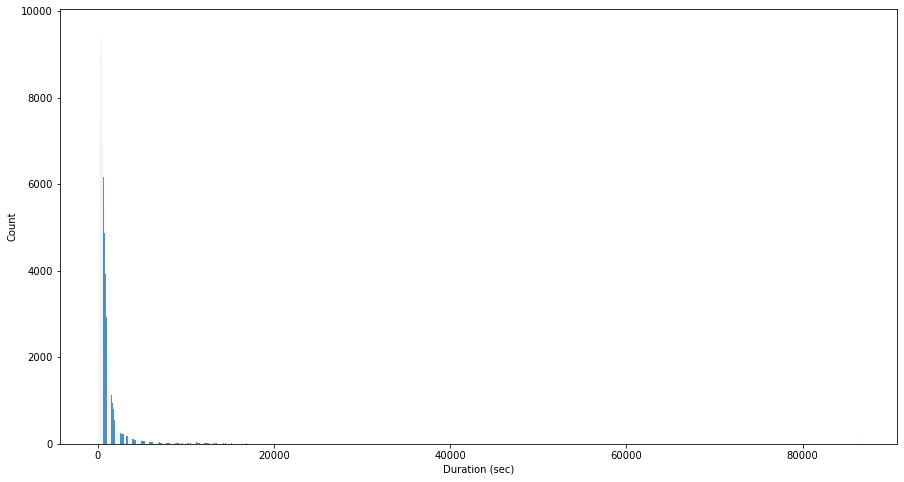

In [28]:
plt.figure(figsize = (15,8))
sns.histplot(la_data['Duration (sec)'])

This graph shows that the distribution of individual ride times in LA was right skewed, with the vast majority of rides being fairly short in 2016.

In [29]:
## Grouping LA Data by Month
la_data = la_data.sort_values('Month')
la_data_mean = la_data.groupby(['Month']).mean()
la_data_sum = la_data.groupby(['Month']).sum()

# convert seconds to hours

def sec_to_hr(num):
    return num // 360
la_data_sum = la_data_sum.rename(columns = {'Duration (sec)': 'Duration (hr)'}).apply(sec_to_hr)

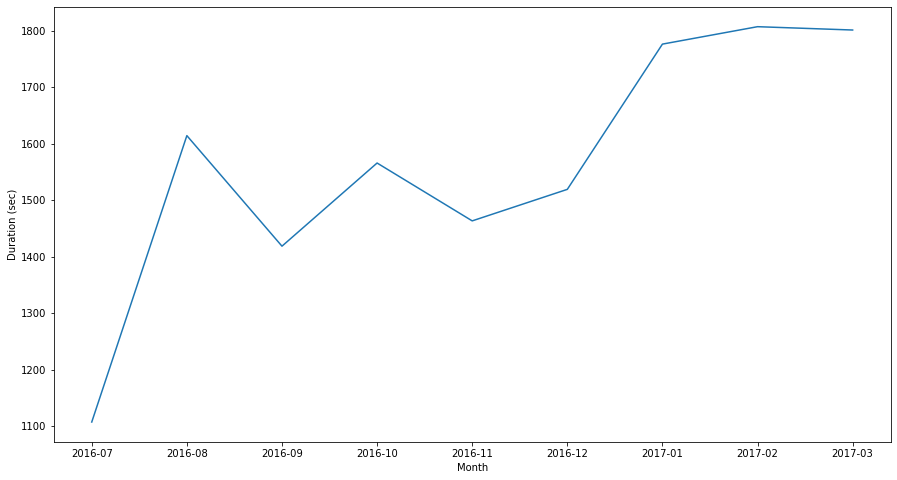

In [30]:
# Graph of the mean duration of bike rides per month in LA
plt.figure(figsize = (15,8))
mean_duration_la = sns.lineplot(data = la_data_mean, y = 'Duration (sec)', x = 'Month')

This graph shows that the mean duration of bike rides per month in LA generally increased from 2016 to 2017.

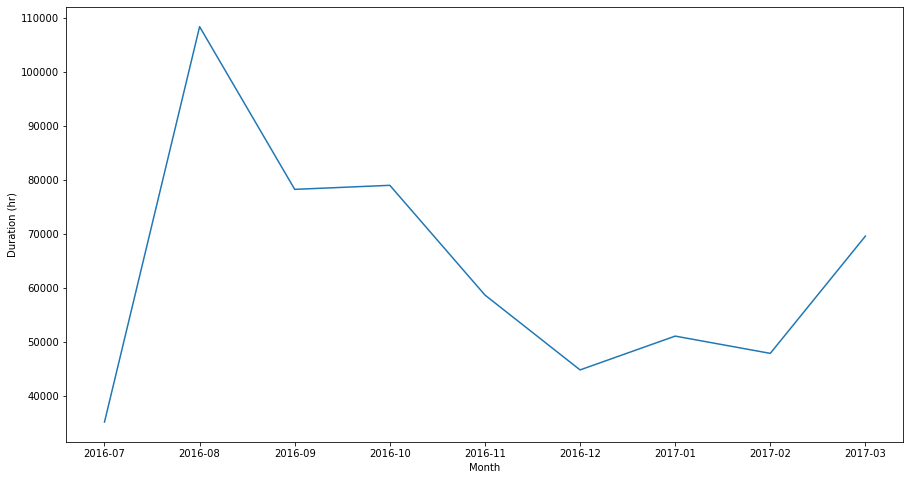

In [31]:
# Graph of the total duration of bike rides per month in LA 
plt.figure(figsize = (15,8))
total_duration_la = sns.lineplot(data = la_data_sum, y = 'Duration (hr)', x = 'Month')

This graph shows that the total duration of bike rides per month in LA actually decreased somewhat from 2016 to 2017, peaking in August of 2016.

<h2>Chicago</h2>

<AxesSubplot:xlabel='Duration (sec)', ylabel='Count'>

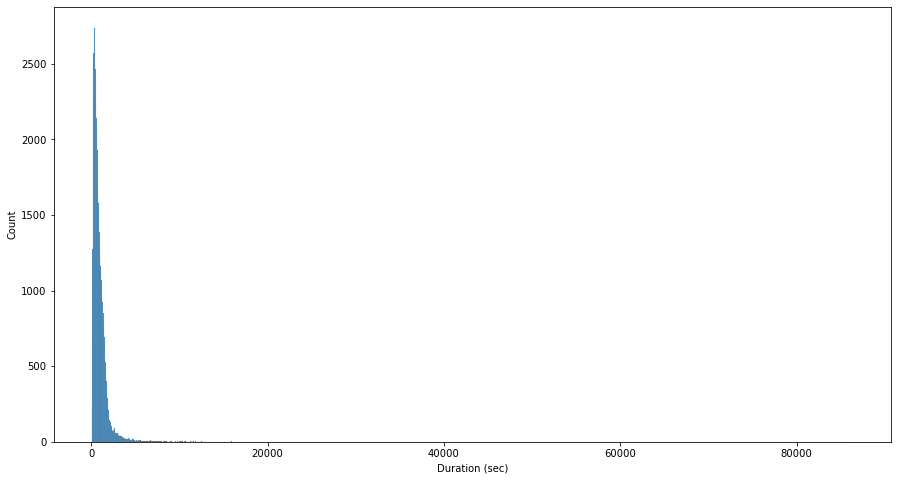

In [32]:
plt.figure(figsize = (15,8))
sns.histplot(chicago_data['Duration (sec)'])

This graph shows that the distribution of individual ride times in Chicago is also very right skewed, with the vast majority of rides being fairly short in 2016.

In [33]:
## Grouping Chicago Data by Month
mean_chicago_data = chicago_data.groupby('month').mean()
total_chicago_data = chicago_data.groupby('month').sum()
total_chicago_data = total_chicago_data.rename(columns = {'Duration (sec)': 'Duration (hr)'}).apply(sec_to_hr)

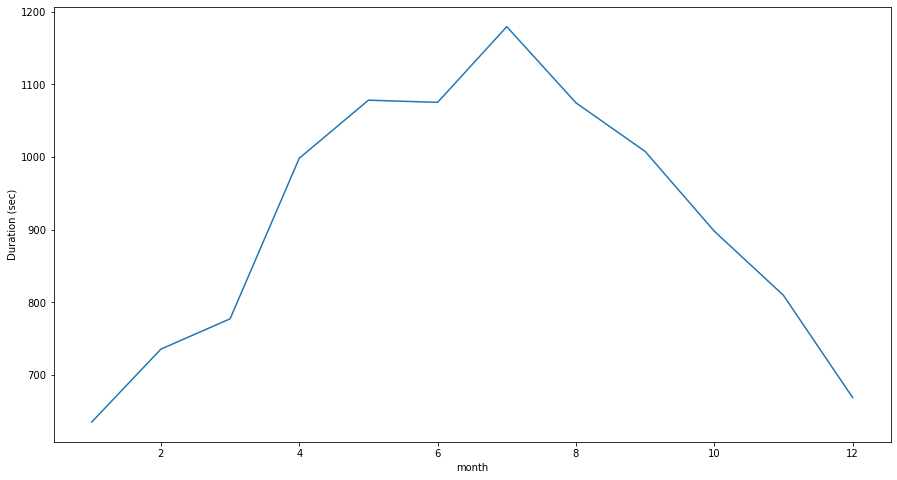

In [34]:
## Chicago Graph
plt.figure(figsize = (15,8))
mean_duration_chicago = sns.lineplot(data = mean_chicago_data, y = 'Duration (sec)', x = 'month')

This graph shows that the mean duration of bike rides in Chicago peaked in the summer months and declines sharply during the winter of 2016.

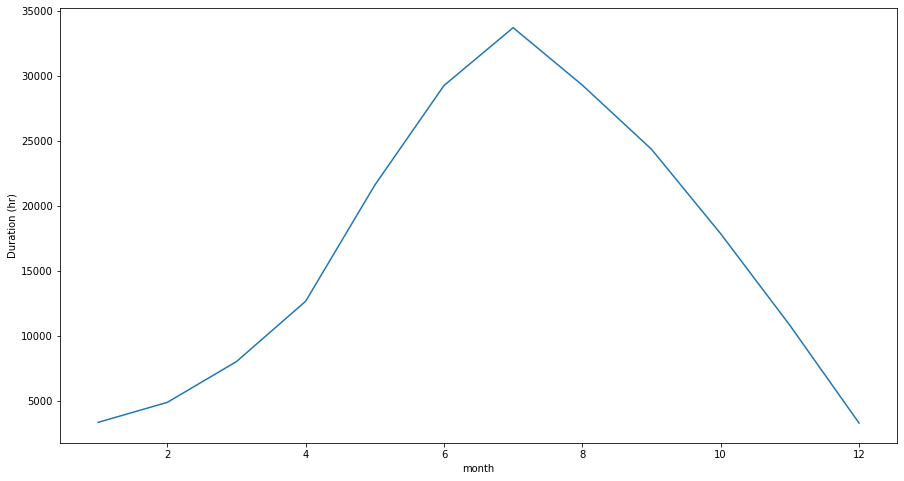

In [35]:
## Chicago Graph
plt.figure(figsize = (15,8))
total_duration_chicago = sns.lineplot(data = total_chicago_data, y = 'Duration (hr)', x = 'month')

Similar to the mean duration, graph shows that the total duration of bike rides in Chicago peaked in the summer months and declines sharply during the winter of 2016.

<h2>D.C.</h2>

<AxesSubplot:xlabel='Duration (sec)', ylabel='Count'>

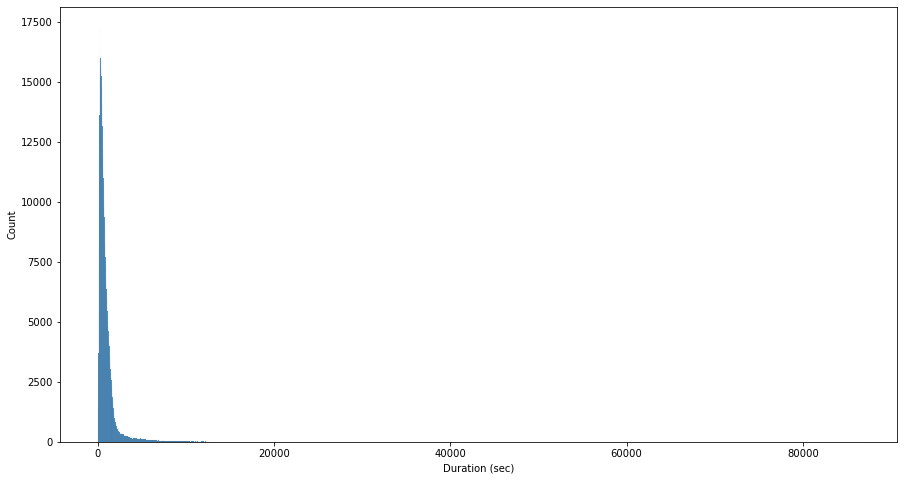

In [36]:
plt.figure(figsize = (15,8))
sns.histplot(dc_data['Duration (sec)'])

The distribution of ride duration in DC shows a similar pattern to LA and Chicago; it is very right skewed and most rides are fairly short.

In [37]:
# Group DC data by date 
dc_data_mean = dc_data.groupby(['Date'], as_index = False).mean()
dc_data_sum = dc_data.groupby(['Date'], as_index = False).sum()
dc_data_sum = dc_data_sum.rename(columns = {'Duration (sec)': 'Duration (hr)'})
dc_data_sum['Duration (hr)'] = dc_data_sum['Duration (hr)'].apply(sec_to_hr)

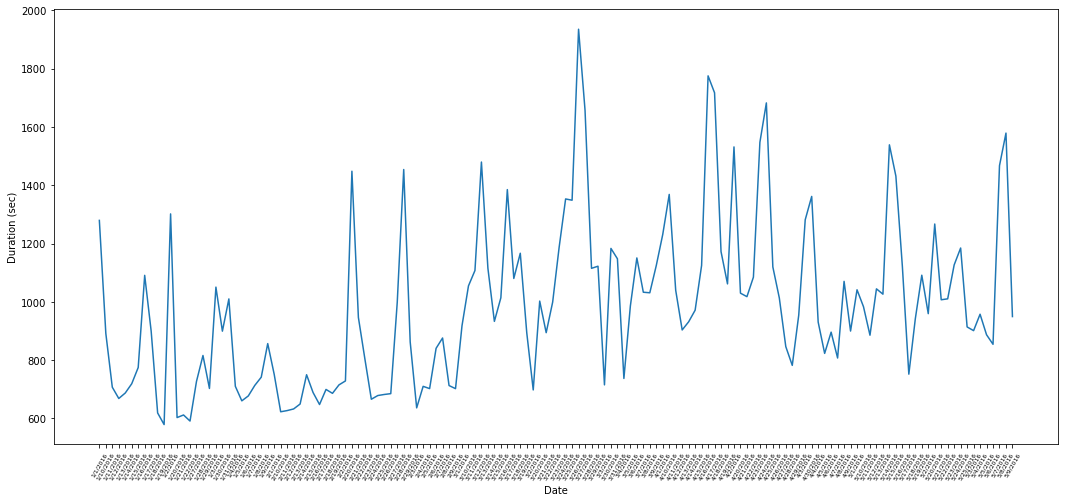

In [38]:
# Graph of the mean duration of bike rides per day in DC
plt.figure(figsize = (18,8))
plt.xticks(rotation = 60, fontsize = 6)
mean_duration_dc = sns.lineplot(data = dc_data_mean, y = 'Duration (sec)', x = 'Date')

This graph shows that the mean duration of bike rides per day in DC has generally seemed to increase over time. The periodic spikes could be due to differing levels of bike traffic on weekends vs weekdays.

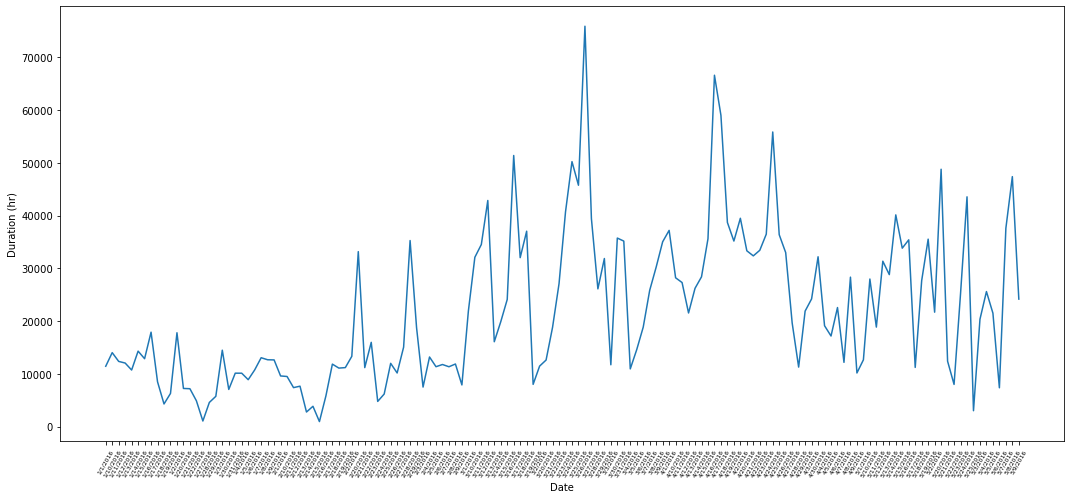

In [39]:
# Graph of the total duration of bike rides per day in DC
plt.figure(figsize = (18,8))
plt.xticks(rotation = 60, fontsize = 6)
total_duration_dc = sns.lineplot(data = dc_data_sum, y = 'Duration (hr)', x = 'Date')

This graph shows that the total duration of bike rides per day in DC has generally seemed to increase over time. The periodic spikes could be due to differing levels of bike traffic on weekends vs weekdays.

## Aggreggated Data 

In this section, we look at how our variables of interest have changed over time in each city.

### Aggreggated data from Los Angeles

<b>Total number of trips in LA (2016-2019)<b/>

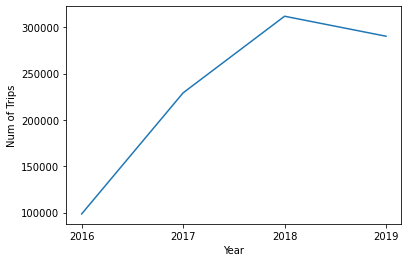

In [40]:
la_data_new_Trips = sns.lineplot(data = la_data_new, x= la_data_new['Year']
                    , y = la_data_new['Num of Trips'])

This plot shows that the total number of trips taken by rideshare users increased steadily from 2016 to 2018 then decreased slightly in 2019. 

<b>Total duration of trips in LA (2016-2019)<b/>

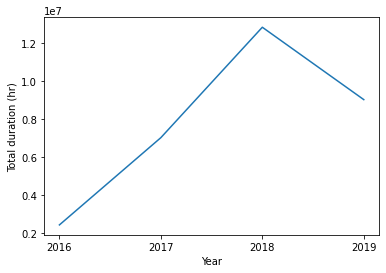

In [41]:
la_data_new_Total = sns.lineplot(data = la_data_new, x= la_data_new['Year']
                    , y = la_data_new['Total duration (hr)'])

Similarly, this plot shows that the total duration of trips by ride share owners increased steadily from 2016 to 2018, then decreased in 2019. 

<b>Average duration of trips in LA (2016-2019)<b/>

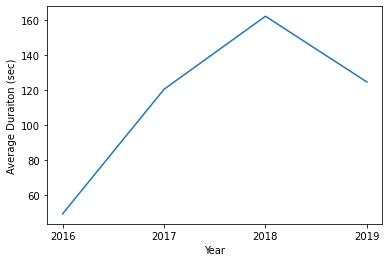

In [42]:
la_data_new_Average = sns.lineplot(data = la_data_new, x= la_data_new['Year']
                    , y = la_data_new['Average Duraiton (sec)'])

Similarly this plot shows that the average duration of trips by ride share owners increased steadily from 2016 to 2018 then decreased in 2019.

<b>Heart disease deaths in LA County (2006-2018)<b/>

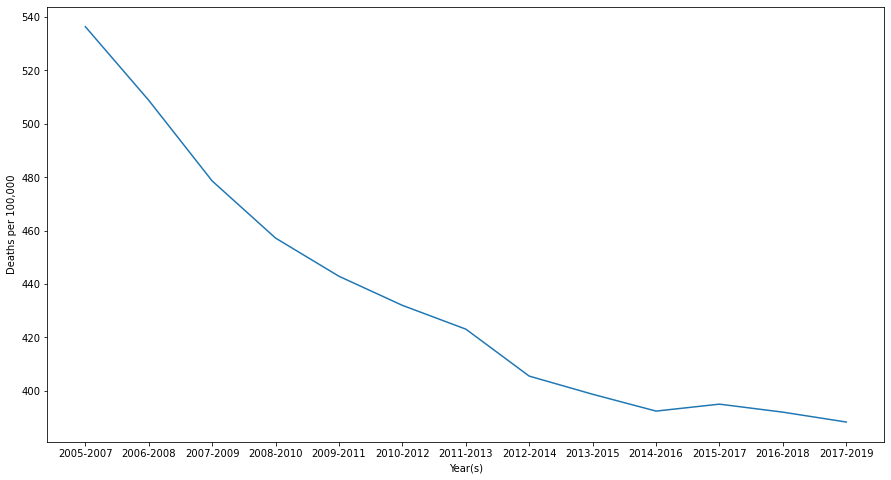

In [43]:
# Graph of deaths from heart disease in LA
plt.figure(figsize = (15,8))
heart_data_LA_graph = sns.lineplot(data = heart_data_LA, x = 'Year(s)', y = 'Deaths per 100,000')

heart_data_LA_temp = heart_data_LA.copy()
heart_data_LA_temp['Year(s)'] = [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016
                                      , 2017, 2018]

This graph shows that deaths from heart disease have shown a consistent decline from 2005 to 2019.

### Aggreggated data from Chicago

<b>Total number of trips taken in Chicago (2013-2019)<b/>

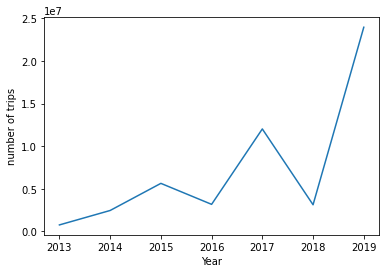

In [44]:
chicago_data_new_Total = sns.lineplot(data = chicago_data_new, x= chicago_data_new['Year']
                    , y = chicago_data_new['number of trips'])

This graph shows that the number of trips taken in Chicago has increased over time, with a peak in 2017 and another significant increase in 2019.

<b>Total duration of trips taken in Chicago (2013-2019)<b/>

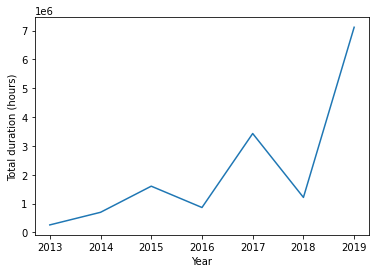

In [45]:
chicago_data_new_Total = sns.lineplot(data = chicago_data_new, x= chicago_data_new['Year']
                    , y = chicago_data_new['Total duration (hours)'])

This graph shows that the total duration of trips taken in Chicago has also increased over time, with a peak in 2017 and another significant increase in 2019. This suggests that the increased trips are of similar durations.

<b>Average trip duration in Chicago (2013-2019)</b>

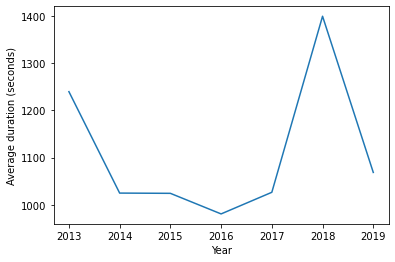

In [46]:
chicago_data_new_Total = sns.lineplot(data = chicago_data_new, x= chicago_data_new['Year']
                    , y = chicago_data_new['Average duration (seconds)'])

Interestingly, this shows that trip length peaked in 2018, the same year that trip duration and number of trips decreased. Aside from 2013 and 2018 the trip duration appears to have stayed fairly constant, between 1000 and 1100 seconds.

<b>Heart disease deaths in Chicago (2005-2019)</b>

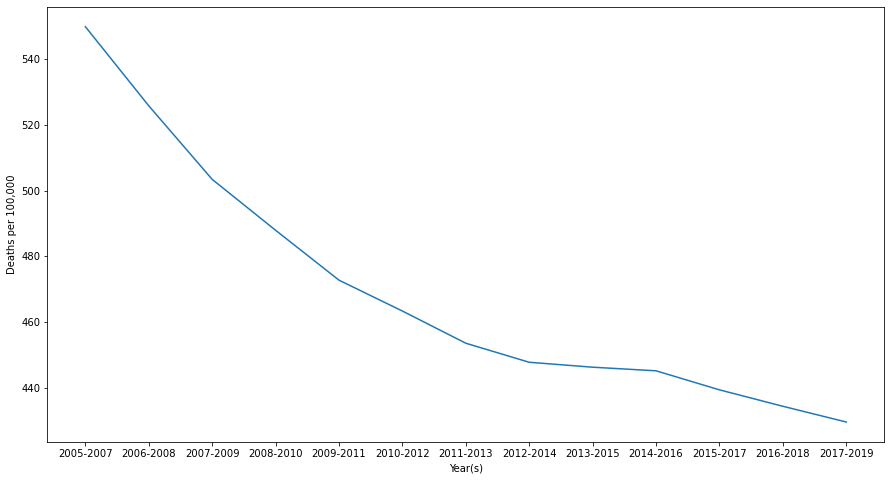

In [47]:
## Heart data of Chicago Graph
plt.figure(figsize = (15,8))
heart_data_Chicago_graph = sns.lineplot(data = heart_data_Chicago, x = 'Year(s)', y = 'Deaths per 100,000')

heart_data_Chicago_temp = heart_data_Chicago.copy()
heart_data_Chicago_temp['Year(s)'] = [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016
                                      , 2017, 2018]

This graph that shows in Cook County (where Chicago is), heart disease has also consistently declined since 2005. There appears to be a change in the slope of the line such that mortality rates decrease more sharply beginning around 2014-2016. It is unclear if it is a significant difference, but if it is it could support our hypothesis that the rising popularity of bikesharing around 2016 decreased heart disease mortality.

### Aggreggated data from D.C.

<b>Total duration of bike rides in DC (2013-2019)<b/>

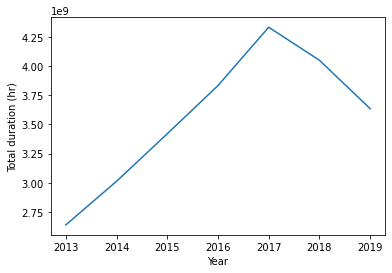

In [48]:
dc_data_new_Total = sns.lineplot(data = dc_data_new, x= dc_data_new['Year']
                    , y = dc_data_new['Total duration (hr)'])

This plot shows that the total duration of bike rides per day in DC increased from 2013 to 2017, then decreased from 2017 to 2019.

<b>Average duration of bike rides in DC (2013-2019)<b/>

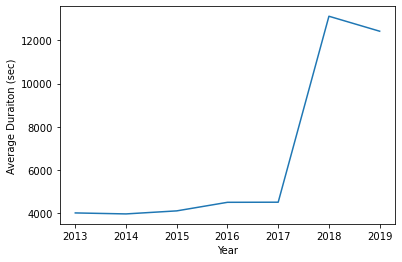

In [49]:
dc_data_new_Average = sns.lineplot(data = dc_data_new, x= dc_data_new['Year']
                    , y = dc_data_new['Average Duraiton (sec)'])

This plot shows that the average duration of bike rides per day in DC increased from 2013 to 2017, dramatically increased from 2017 to 2018, then decreased from 2018 to 2019. This is an interesting pattern that we did not see in the data for the other two cities and could suggest that bikesharing increased in popularity in DC during those years.

<b>Total number of trips taken in DC (2013-2019)<b/>

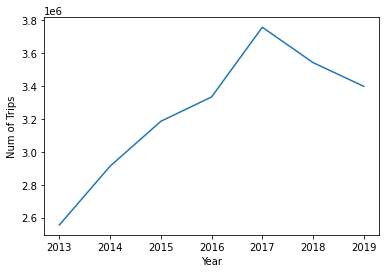

In [50]:
dc_data_new_Trips = sns.lineplot(data = dc_data_new, x= dc_data_new['Year']
                    , y = dc_data_new['Num of Trips'])

This plot shows that the number of bike rides per day in DC increased from 2013 to 2017, then decreased from 2017 to 2019.

<b>Heart disease deaths in DC County (2005-2019)<b/>

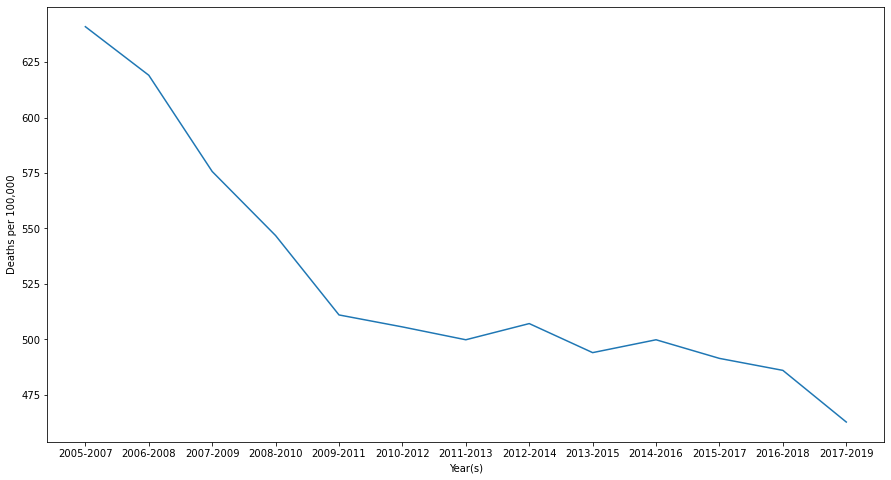

In [51]:
plt.figure(figsize = (15,8))
heart_data_DC_graph = sns.lineplot(data = heart_data_DC, x = 'Year(s)', y = 'Deaths per 100,000')
##
heart_data_DC_temp = heart_data_DC.copy()
heart_data_DC_temp['Year(s)'] = [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016
                                      , 2017, 2018]

This graph shows, similar to the other cities, that heart disease mortality has declined in DC. It decreased more sharply from 2005-2011, and continued to decrease but at a more gradual rate after that. 

## Analysis

In the following cells, we attempt to run linear regressions on the data for each city to see if there is a relationship between heart disease mortality rates and each of our bikesharing measures (average trip duration, number of trips, and overall trip duration [sum of all trips taken]). 

### Los Angeles linear regression

In [52]:
## creating a dataframe to use with statsmodels
la_data_new_test = la_data_new.copy()

# add a column for heart disease death data from 2016-2019
la_data_new_test['Deaths'] = heart_data_LA['Deaths per 100,000'][-4:].tolist()

# rename columns
la_data_new_test = la_data_new_test.rename(columns = {'Average Duraiton (sec)': 'Average',
                                                     'Total duration (hr)': 'Total',
                                                     'Num of Trips': 'NumTrips'})
la_data_new_test

,Unnamed: 0,City,Year,Average,Total,NumTrips,Deaths
0,0,Los Angeles,2016,49.275862,2421733,98637,392.4
1,1,Los Angeles,2017,120.572151,7020915,229255,395.0
2,2,Los Angeles,2018,162.381270,12838601,311894,392.0
3,3,Los Angeles,2019,124.761510,9024061,290342,388.3


<b>RELATIONSHIP BETWEEN DEATHS AND AVERAGE DURATION<b/>

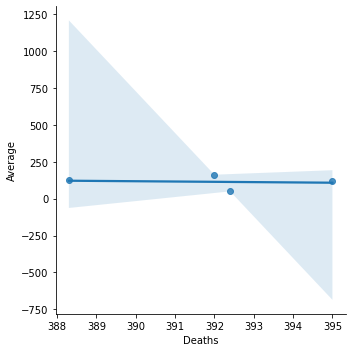

In [53]:
sns.lmplot(data = la_data_new_test, x = 'Deaths', y = 'Average')

In [54]:
outcome, predictors = patsy.dmatrices('Deaths ~ Average', la_data_new_test)

mod_log = sm.OLS(outcome, predictors)

res_log = mod_log.fit()

print(res_log.summary())

                            OLS Regression Results                            
Dep. Variable:                 Deaths   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.479
Method:                 Least Squares   F-statistic:                   0.02800
Date:                Mon, 14 Mar 2022   Prob (F-statistic):              0.882
Time:                        23:28:03   Log-Likelihood:                -9.1313
No. Observations:                   4   AIC:                             22.26
Df Residuals:                       2   BIC:                             21.04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    392.7093      4.978     78.890      0.0

<b>RELATIONSHIP BETWEEN DEATHS AND TOTAL DURATION<b/>

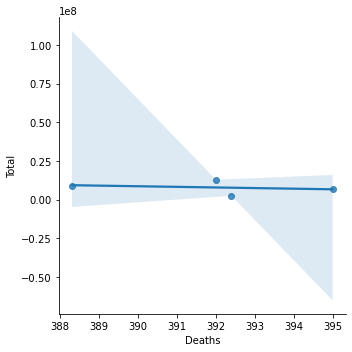

In [55]:
sns.lmplot(data = la_data_new_test, x = 'Deaths', y = 'Total')

In [56]:
outcome, predictors = patsy.dmatrices('Deaths ~ Total', la_data_new_test)

mod_log = sm.OLS(outcome, predictors)

res_log = mod_log.fit()

print(res_log.summary())

                            OLS Regression Results                            
Dep. Variable:                 Deaths   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                 -0.405
Method:                 Least Squares   F-statistic:                    0.1345
Date:                Mon, 14 Mar 2022   Prob (F-statistic):              0.749
Time:                        23:28:03   Log-Likelihood:                -9.0289
No. Observations:                   4   AIC:                             22.06
Df Residuals:                       2   BIC:                             20.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    393.1749      3.779    104.029      0.0

<b>RELATIONSHIP BETWEEN DEATHS AND TOTAL NUMBER OF TRIPS<b/>

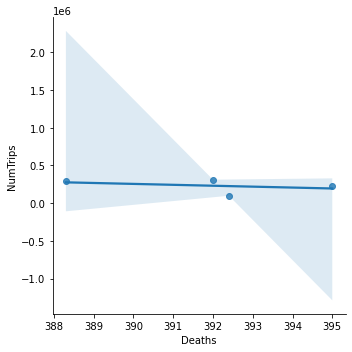

In [57]:
sns.lmplot(data = la_data_new_test, x = 'Deaths', y = 'NumTrips')

In [58]:
outcome, predictors = patsy.dmatrices('Deaths ~ NumTrips', la_data_new_test)

mod_log = sm.OLS(outcome, predictors)

res_log = mod_log.fit()

print(res_log.summary())

                            OLS Regression Results                            
Dep. Variable:                 Deaths   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                 -0.317
Method:                 Least Squares   F-statistic:                    0.2782
Date:                Mon, 14 Mar 2022   Prob (F-statistic):              0.651
Time:                        23:28:03   Log-Likelihood:                -8.8986
No. Observations:                   4   AIC:                             21.80
Df Residuals:                       2   BIC:                             20.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    394.2629      4.706     83.773      0.0

Based off the p-values and R-squared values returned by the linear regression for LA, average trip duration, sum of trip duration, and total number of rides are most likely not statistically significant predictors of deaths from cardiovascular disease per capita. None of the p-values or R-squared values are in the range of we would consider statistically significant (p < 0.05) or (R-squared > .5).

Overall, these results do not indicate that there is a relationship between average trip duration, sum of trip duration, or total number of rides with deaths from cardiovascular disease per capita.


### Chicago Linear Regression

In [59]:
chicago_data_new_test = chicago_data_new.copy()
chicago_data_new_test['Deaths'] = heart_data_Chicago['Deaths per 100,000'][-7:].tolist()
chicago_data_new_test = chicago_data_new_test.rename(columns = {'Average duration (seconds)': 'Average',
                                                               'Total duration (hours)': 'Total', 
                                                               'number of trips': 'NumTrips'})
chicago_data_new_test

,City,Year,Average,Total,NumTrips,Deaths
0,Chicago,2013.0,1239.470455,2.615930e+05,759789.0,453.5
1,Chicago,2014.0,1024.938453,6.988483e+05,2454639.0,447.7
2,Chicago,2015.0,1024.424273,1.604386e+06,5638084.0,446.2
3,Chicago,2016.0,980.884489,8.651374e+05,3175190.0,445.1
4,Chicago,2017.0,1026.619499,3.429965e+06,12027702.0,439.3
5,Chicago,2018.0,1398.990678,1.215173e+06,3126984.0,434.3
6,Chicago,2019.0,1068.625765,7.114661e+06,23967960.0,429.5


<b>RELATIONSHIP BETWEEN DEATH AND AVERAGE DURATION<b/>

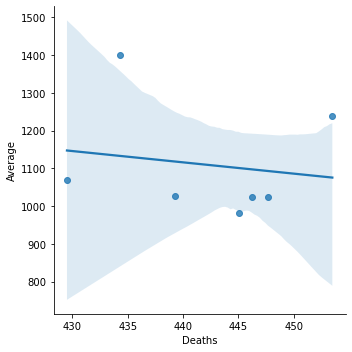

In [60]:
sns.lmplot(data = chicago_data_new_test, x = 'Deaths', y = 'Average')

In [61]:
outcome, predictors = patsy.dmatrices('Deaths ~ Average', chicago_data_new_test)

mod_log = sm.OLS(outcome, predictors)

res_log = mod_log.fit()

print(res_log.summary())

                            OLS Regression Results                            
Dep. Variable:                 Deaths   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                 -0.168
Method:                 Least Squares   F-statistic:                    0.1353
Date:                Mon, 14 Mar 2022   Prob (F-statistic):              0.728
Time:                        23:28:04   Log-Likelihood:                -24.123
No. Observations:                   7   AIC:                             52.25
Df Residuals:                       5   BIC:                             52.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    452.0182     26.830     16.847      0.0

<b>RELATIONSHIP BETWEEN DEATH AND TOTAL DURATION<b/>

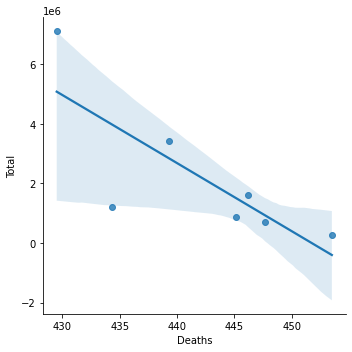

In [62]:
sns.lmplot(data = chicago_data_new_test, x = 'Deaths', y = 'Total')

In [63]:
outcome, predictors = patsy.dmatrices('Deaths ~ Total', chicago_data_new_test)

mod_log = sm.OLS(outcome, predictors)

res_log = mod_log.fit()

print(res_log.summary())

                            OLS Regression Results                            
Dep. Variable:                 Deaths   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     8.193
Date:                Mon, 14 Mar 2022   Prob (F-statistic):             0.0353
Time:                        23:28:04   Log-Likelihood:                -20.820
No. Observations:                   7   AIC:                             45.64
Df Residuals:                       5   BIC:                             45.53
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    448.1318      2.957    151.573      0.0

<b>RELATIONSHIP BETWEEN DEATH AND NUMBER OF TRIPS<b/>

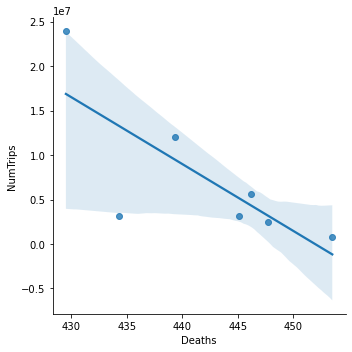

In [64]:
sns.lmplot(data = chicago_data_new_test, x = 'Deaths', y = 'NumTrips')

In [65]:
outcome, predictors = patsy.dmatrices('Deaths ~ NumTrips', chicago_data_new_test)

mod_log = sm.OLS(outcome, predictors)

res_log = mod_log.fit()

print(res_log.summary())

                            OLS Regression Results                            
Dep. Variable:                 Deaths   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     6.916
Date:                Mon, 14 Mar 2022   Prob (F-statistic):             0.0465
Time:                        23:28:05   Log-Likelihood:                -21.177
No. Observations:                   7   AIC:                             46.35
Df Residuals:                       5   BIC:                             46.25
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    447.8698      3.094    144.776      0.0

Based off the p-values and R-squared values returned by the linear regression for Chicago, sum of trip durations and total number of rides appear to be statistically significant predictors of deaths from cardiovascular disease. The R-squared values for both regressions are .621 and .58 respectively, indicating moderate effect. The p-values for both regressions are .035 and .047 respectively which we would consider statistically significant. 

However, none of the p-values or R-squared values for the average trip duration regression are in the range of what we would consider statistically significant (p < 0.05) or (R-squared > .5).

Overall, these results indicate that there is a relationship between sum of trip duration and total number of rides deaths with cardiovascular disease deaths, but no relationship between average trip duration and cardiovascular disease deaths per capita. 

### DC linear regression

In [66]:
dc_data_new_test = dc_data_new.copy()
dc_data_new_test['Deaths'] = heart_data_DC['Deaths per 100,000'][-7:].tolist()
dc_data_new_test = dc_data_new_test.rename(columns = {'Average Duraiton (sec)': 'Average',
                                                     'Total duration (hr)': 'Total',
                                                     'Num of Trips': 'NumTrips'})
dc_data_new_test

,Unnamed: 0,City,Year,Average,Total,NumTrips,Deaths
0,0,DC,2013,4008.900852,2637921822,2555541,499.8
1,1,DC,2014,3963.235575,3012103845,2913150,507.1
2,2,DC,2015,4104.059452,3420101908,3185906,494.0
3,3,DC,2016,4500.924013,3833466787,3333994,499.8
4,4,DC,2017,4506.081815,4334096329,3757777,491.4
5,5,DC,2018,13120.567290,4050769070,3542684,486.0
6,6,DC,2019,12426.777423,3635280100,3398417,462.7


<b>RELATIONSHIP BETWEEN DEATH AND AVERAGE DURATION<b/>

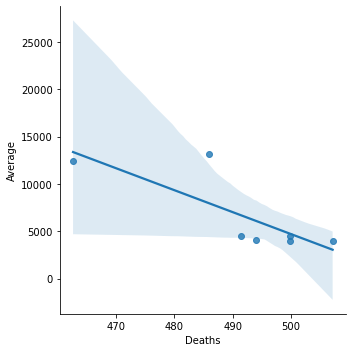

In [67]:
sns.lmplot(data = dc_data_new_test, x = 'Deaths', y = 'Average')

In [68]:
outcome, predictors = patsy.dmatrices('Deaths ~ Average', dc_data_new_test)

mod_log = sm.OLS(outcome, predictors)

res_log = mod_log.fit()

print(res_log.summary())

                            OLS Regression Results                            
Dep. Variable:                 Deaths   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     8.909
Date:                Mon, 14 Mar 2022   Prob (F-statistic):             0.0306
Time:                        23:28:05   Log-Likelihood:                -24.491
No. Observations:                   7   AIC:                             52.98
Df Residuals:                       5   BIC:                             52.87
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    509.9051      7.117     71.644      0.0

<b>RELATIONSHIP BETWEEN DEATH AND TOTAL DURATION<b/>

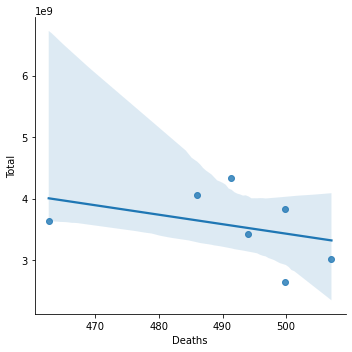

In [69]:
sns.lmplot(data = dc_data_new_test, x = 'Deaths', y = 'Total')

In [70]:
outcome, predictors = patsy.dmatrices('Deaths ~ Total', dc_data_new_test)

mod_log = sm.OLS(outcome, predictors)

res_log = mod_log.fit()

print(res_log.summary())

                            OLS Regression Results                            
Dep. Variable:                 Deaths   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                 -0.030
Method:                 Least Squares   F-statistic:                    0.8260
Date:                Mon, 14 Mar 2022   Prob (F-statistic):              0.405
Time:                        23:28:05   Log-Likelihood:                -27.537
No. Observations:                   7   AIC:                             59.07
Df Residuals:                       5   BIC:                             58.97
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    524.2870     36.451     14.383      0.0

<b>
    RELATIONSHIP BETWEEN DEATH AND NUMBER OF TRIPS<b/>

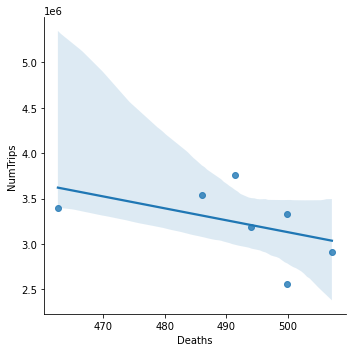

In [71]:
sns.lmplot(data = dc_data_new_test, x = 'Deaths', y = 'NumTrips')

In [72]:
outcome, predictors = patsy.dmatrices('Deaths ~ NumTrips', dc_data_new_test)

mod_log = sm.OLS(outcome, predictors)

res_log = mod_log.fit()

print(res_log.summary())

                            OLS Regression Results                            
Dep. Variable:                 Deaths   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     1.429
Date:                Mon, 14 Mar 2022   Prob (F-statistic):              0.285
Time:                        23:28:06   Log-Likelihood:                -27.192
No. Observations:                   7   AIC:                             58.38
Df Residuals:                       5   BIC:                             58.28
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    546.2820     46.090     11.853      0.0

Based off the p-values and R-squared values returned by the linear regression for Washington D.C., average trip duration appears to be a statistically significant predictor of deaths from cardiovascular disease per capita. The R-squared values for both regressions is .641, indicating a moderate effect. The p-values for both regression is .031, which we would consider statistically significant. 

However, none of the p-values or R-squared values for the total trip duration or total number of trips regression are in the range of what we would consider statistically significant (p < 0.05) or (R-squared > .5).

Overall, these results indicate that there is a relationship between average ride duration with cardiovascular disease deaths, but no relationship between total trip duration and cardiovascular disease deaths or total number of rides and cardiovascular disease deaths. 

# Ethics & Privacy

All of our datasets are publicly available on the Internet from the CDC and the bikesharing companies themselves, so we have permission to use them. There is no sensitive or personally identifiable information such as names or addresses associated with any of the data we are using, so there are no ethics or privacy violations in that regard. The health data is recorded on the county, so there is no way to trace any data point back to an individual, and we did not make any attempts to do so. 

Because the datasets are collected by the bikesharing systems from every person who uses them, there also should not be biases in terms of who is included or excluded. However, as noted above in the introduction, the users of bikeshare systems are generally more likely to be young, male, and Caucasian relative to the communities they live in. Thus, the results must be used with caution; in order to ethically interpret the results, we must keep in mind that any potential benefits of implementing bikeshare systems would not be equally distributed across the population. This could have important implications for urban planners and policymakers when deciding whether or not to invest in bikeshare systems as part of public health and infrastructure.


# Conclusion & Discussion


#### Summary

It is clear from the plots that we didn't have enough data points to run a truly accurate linear regression, so all of these results should be interpreted with that limitation in mind. According to the regressions we were able to run, however, there was no correlation at all between cardiovascular health and any measure of bikeshare usage in Los Angeles. Interestingly, the Washington D.C. data indicated a moderate effect on relationship between cardiovascular deaths and average ride duration, while the Chicago data indicated a moderate relationship between cardiovascular deaths per capita and total ride duration as well as total number of rides. 

No two cities had the same combination of bikesharing measures that were significant predictors of cardiovascular deaths. Additionally, the LA data showed no correlation at all. Thus, our results are mixed. Due to the lack of data neccesary to run a meaningful linear regression as well as the varied results returned by the regressions we were able to model, we can't conclude that there is a correlation between bike sharing and cardiovascular health. However, we also do not exclude the possibility that bikesharing may have an effect, and we think that this could be a fruitful topic for further study.

#### Limitations
There were many other limitations to our analysis, the largest probably being its small size. We only looked at three cities because of the data that was publicly available as well as GitHub's storage limitations. We were not able to upload as many datasets as we wanted to the repo, even after cleaning some of the files locally. If we were to continue developing this analysis, we would definitely include more cities. 

There were also a limited number of years for which we had bikeshare data available. As noted above, bikesharing made its earliest appearance in the US in 2010 and we chose to exclude 2020 onwards due to the COVID-19 pandemic. This left us with a very small subset of years to analyze, especially since some bike companies did not exist in our cities of interest or did not release data for all 10 of those years. This also made it difficult to construct a valid linear model. To see if there is truly an effect, this analysis should be repeated with more years of data in the future.

Another limitation was the availability of health data. Because we have heart disease data only at the county level, but bike data at the city level, the results may be inaccurate due to all of the people in the county who do not live in the urban centers where the bikes are. 

Finally, there are almost certainly confounding variables that contribute to changes in heart disease mortality rates, such as healthcare infrastructure, smoking, diet, SES, and so on, that we did not include in our model. As our EDA demonstrated, in all three of our cities, heart disease mortality has been steadily declining since 2005. It is possible that the decrease in heart disease mortality is simply an extension of this trend that is completely unrelated to bikesharing. There may also be other non-health-related factors such as the geography or the biking culture of a particular city that affect the amount or intensity of biking and thus its health impacts; it would have been informative to also combine our datasets and perform a regression on all of the data in addition to dividing it up by city so we could control for some of these city-specific factors. 


# Team Contributions


- Kevin Bui: data cleaning, EDA, statsmodels analysis, visualizations
- David Chang: finding datasets, EDA, statsmodels analysis, interpretation of statsmodels results, slides for video
- Lawrence Song: data cleaning, ethics and privacy, video
- Zoe Wong: background and prior work, interpretation of visualizations, ethics and privacy, conclusion and discussion, slides for video 